## pre-requirements

- Colab 런타임 GPU 선택 (cuda 사용)
- 미설치 라이브러리 : mxnet, sentencepiece, transformers==3.0.2, torch
- 구글 드라이브 연결 : /gdrive
- 핵심 라이브러리 : torch

__KoBERT(Korean BERT) 설치__

<font color='red'>==> Apple Sillicon(M1) 에는 설치할 수 없음</font>

- [Korean BERT pre-trained cased (KoBERT)](https://pythonrepo.com/repo/SKTBrain-KoBERT#how-to-install)
  - Mac M1(ARM64) 에 대해 onnxruntime 설치 지원이 안된다
  - [깃허브 ISSUE](https://github.com/SKTBrain/KoBERT/issues/86): onnxruntime==1.8.0 필수 조건을 충족 못시킴
- [KoBERT/requirements.txt](https://github.com/SKTBrain/KoBERT/blob/master/requirements.txt)

```text
boto3
gluonnlp >= 0.6.0
mxnet >= 1.4.0
onnxruntime == 1.8.0      <= 이 녀석 때문에 설치 안됨!
sentencepiece >= 0.1.6
torch >= 1.7.0
transformers >= 4.8.1
```

__참고__

Colab 에 설치해보자

- [[파이썬]KoBERT로 다중 분류 모델 만들기 - 코드](https://velog.io/@seolini43/KOBERT%EB%A1%9C-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-%ED%8C%8C%EC%9D%B4%EC%8D%ACColab)


In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 34.9 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595742 sha256=0eb46002e2e13ea41c36d247523b382f301e3cdc03fee4204af0ac8241fe104d
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 30.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [ ]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-mgxnhpc5
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-mgxnhpc5
     |████████████████████████████████| 132 kB 13.9 MB/s 
     |████████████████████████████████| 4.5 MB 46.1 MB/s 
     |████████████████████████████████| 4.4 MB 51.9 MB/s 
     |████████████████████████████████| 6.6 MB 52.9 MB/s 
     |████████████████████████████████| 101 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 21.3 MB/s 
     |████████████████████████████████| 9.0 MB 53.2 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 127 kB 72.2 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=457a78f3651b07390853878200b7abaa8a380dd1943722227f0836e59d812513
  Stored in directory

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
# pytorch 사용할거라 tensorflow 임포트 안함

np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석")
!ls -l data

Mounted at /gdrive
total 52701
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 25 09:17 submission_v2.csv
-rw------- 1 root root  188889 Jul 25 09:11 submission_v3.csv
-rw------- 1 root root  188889 Jul 25 13:52 submission_v4.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


## 리뷰 평점 예측을 위한 BERT 모델

### 전체 과정

1. 데이터 준비
  - train_df 읽어오기
  - train, valid 분리
  - target(y) 전처리
2. 텍스트 벡터화
  - sequence 변환, 패딩
  - word2vec 로부터 embedding_matrix 준비
3. 모델 생성
  - Embedding Layer
  - 1D CNN Layer
  - Output Layer
4. 모델 훈련
  - optimizer, loss, metrics
  - fit
  - evaluate
5. 모델 활용(예측/분류)
  - 데이터 불러오기: test_df
  - 동일한 전처리와 벡터화 적용
  - predict
6. 모델 시각화 (실제값/예측값)
  - 예측값 시각화
  - 실제값 시각화
  

### BERT 모델

설치

- [깃허브 - KoBERT](https://github.com/SKTBrain/KoBERT)

전처리 활용

- [HanBert 네이버 긍정부정 댓글 판단](https://parksrazor.tistory.com/231)

__참고__

- [Korean BERT (Bidirectional Encoder Representations from Transformers)](https://sktelecom.github.io/project/kobert/)
- [KoBERT로 다중 분류 모델 만들기 - PyTorch](https://velog.io/@seolini43/KOBERT%EB%A1%9C-%EB%8B%A4%EC%A4%91-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-%ED%8C%8C%EC%9D%B4%EC%8D%ACColab)
- [케라스 BERT 네이버 영화리뷰 감성분석](https://github.com/kimwoonggon/publicservant_AI/blob/master/03_%EC%BC%80%EB%9D%BC%EC%8A%A4%EB%A1%9C_%EB%B2%84%ED%8A%B8_%EB%B9%A0%EB%A5%B4%EA%B2%8C_%EB%8F%8C%EB%A0%A4%EB%B3%B4%EA%B8%B0_With_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_TUTORIAL.ipynb)


### 한국어 BERT 모델들

- [깃허브-KrBERT](https://github.com/snunlp/KR-BERT): 작은 사이즈의 모델
- [깃허브-KcBERT](https://github.com/Beomi/KcBERT): 뉴스 댓글
  - [캐글-KcBERT Pre-Training Corpus (Korean News Comments)](https://www.kaggle.com/datasets/junbumlee/kcbert-pretraining-corpus-korean-news-comments) 
- [KcELECTRA](https://github.com/Beomi/KcELECTRA): 구어체 뉴스 댓글, 악성댓글에 강점
  - KcBERT 의 확장판



### 0. KoBERT 설정

- GPU 설정
- BERT 모델 불러오기 (pytorch)


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm.notebook import tqdm
# from tqdm import tqdm_notebook  # deprecated => tqdm.notebook.tqdm

In [ ]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW  # deprecated => torch.optm.AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
#GPU 사용 (런타임 GPU 선택)
device = torch.device("cuda:0")

In [ ]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


### 1. 데이터 준비

- train_df 읽어오기
- train, valid 분리
- target(y) 전처리


In [ ]:
# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 데이터
file_path = f'{data_path}/train.csv'

## Pickle 로딩
train_df = pd.read_csv(file_path)
# train_df = train_df.drop(['Unnamed: 0'], axis='columns')
print(train_df.shape)

train_df
# 24984 rows × 8 columns

(25000, 3)


,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5
...,...,...,...
24995,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5
24996,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2
24997,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4
24998,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2


In [ ]:
# target 전처리
# ==> 숫자 [1~5] 를 [0~4] 로 변환 (예측할 때 원핫인코딩으로 출력)
train_df['target'] = train_df['target'].apply(lambda v: v-1)
train_df['target'].dtype

dtype('int64')

In [ ]:
from sklearn.model_selection import train_test_split

# 문자열 리스트로 dataset 생성
data = train_df[['reviews','target']].astype(str).values.tolist()
dataset_train, dataset_valid = train_test_split(data, test_size=0.2, random_state=42)

# 내용 확인
print(dataset_train[0])
print(dataset_train[-1])

['왠만해선 리뷰 안쓰는데요, 너무 까실까실해서 살이 찔려요. 그리고 군데군데 대나무가 갈라져서 뜯겨 지네요. 반품포장 힘들어 그냥 한해만 대충 쓸까봐요 에휴~~', '0']
['그냥 싼거 다이소 보다 못합니다 거치대는 진짜 무쓸모 그리고 모기잡기가 너무 무거움 사지마세요 진짜 비추 그냥 5000원 짜리 사세요', '0']


### 2. BERT 로 텍스트 전처리

- BERTDataset 클래스
- BERTSPTokenizer 생성: KoBERT 에서 tokenizer 가져오기
- BERTDataset 생성

In [ ]:
class BERTDataset(Dataset):
  def __init__(self, dataset, sent_idx, label_idx, 
               bert_tokenizer, max_len, pad, pair):
    transform = nlp.data.BERTSentenceTransform(
        bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

    self.sentences = [transform([ i[sent_idx] ]) for i in dataset]
    self.labels = [np.int32( i[label_idx] ) for i in dataset]

  def __getitem__(self, i):
    return (self.sentences[i] + (self.labels[i], ))

  def __len__(self):
    return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [ ]:
# KoBERT 토크나이저
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

# Dim=64 벡터화 + 패딩 ==> 리뷰(index=0), 평점(index=1)
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_valid = BERTDataset(dataset_valid, 0, 1, tok, max_len, True, False)

# 데이터 확인
data_train[0]

using cached model. /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


(array([   2,  517, 6994, 6150, 7848, 6559, 1900, 6431, 3135, 6779, 5761,
        6999,  517,   46, 1458,  517, 5591, 6738, 5591, 6738, 7850, 2643,
        7096,  517, 7386, 6060, 6999,  517,   54, 1210, 1165, 5850, 5512,
        5850, 1633, 5660, 5330,  781, 6003, 7245, 6553,  517, 5994, 5411,
        4297, 5703,  517,   54, 2207, 7748, 7728, 7178, 5213, 6855, 1189,
        4955, 7848, 6150, 1633, 7472, 3087, 5591, 6393,    3], dtype=int32),
 array(64, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
# torch 형식의 dataset 생성 (batch_size 만큼씩 묶어서 iteratable 생성)
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=2)
valid_dataloader = torch.utils.data.DataLoader(data_valid, batch_size=batch_size, num_workers=2)

### 3. 모델 생성

- BERTClassifier


In [ ]:
# 모델 훈련 전에 타입 확인
next(iter(train_dataloader))

[tensor([[   2,  517, 6994,  ..., 5591, 6393,    3],
         [   2,  529, 7220,  ..., 3093, 5591,    3],
         [   2, 2123, 5859,  ...,    1,    1,    1],
         ...,
         [   2, 3135, 7271,  ...,    1,    1,    1],
         [   2, 3010, 6559,  ...,    1,    1,    1],
         [   2, 3129, 3080,  ...,    1,    1,    1]], dtype=torch.int32),
 tensor([64, 64, 45, 16, 61, 51, 16, 16, 64, 64, 13, 17, 32, 64, 10, 11, 25, 19,
         10, 46, 41, 18, 32, 19, 13, 10, 17, 24,  8, 10, 64, 21, 26, 27, 11, 64,
         24, 11, 42, 21, 19, 56, 58, 29, 30, 15, 58, 19,  8, 21, 20, 45, 45, 24,
         16, 64, 16, 11, 11, 12, 19,  7, 22, 16], dtype=torch.int32),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32),
 tensor([0, 0, 1, 4, 4, 4, 4, 1, 3, 4, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 0, 4, 4,
        

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,      ## 클래스 수 조정!! ##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

# 학습 곡선: 코사인
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc


### 4. 모델 훈련

- callbacks: 조기종료, 체크포인트
- fit
- evaluate


In [ ]:
train_accuracies = []
valid_accuracies = []
train_losses = []
valid_losses = []

# num_epochs 만큼 반복
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0

    # 훈련
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        # backward with loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()                     # Update learning rate schedule
        # acc
        _acc = calc_accuracy(out, label)
        train_acc += _acc
        train_accuracies.append(_acc)        # 시각화용
        # loss
        _loss = loss.data.cpu().numpy()
        train_losses.append(float(_loss))    # 시각화용
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, _loss, train_acc / (batch_id+1)))

    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    # 평가
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(valid_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        # acc
        _acc = calc_accuracy(out, label)
        test_acc += _acc
        valid_accuracies.append(_acc)        # 시각화용
        # loss
        loss = loss_fn(out, label)
        _loss = loss.data.cpu().numpy()
        valid_losses.append(float(_loss))    # 시각화용

    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

  0%|          | 0/313 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.6261764168739319 train acc 0.71875
epoch 1 batch id 201 loss 0.42359206080436707 train acc 0.8051150497512438
epoch 1 train acc 0.8108027156549521


  0%|          | 0/79 [00:00<?, ?it/s]

epoch 1 test acc 0.6394382911392406


  0%|          | 0/313 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.47855377197265625 train acc 0.8125
epoch 2 batch id 201 loss 0.36813223361968994 train acc 0.8518345771144279
epoch 2 train acc 0.8598742012779552


  0%|          | 0/79 [00:00<?, ?it/s]

epoch 2 test acc 0.6635680379746836


  0%|          | 0/313 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.2989408075809479 train acc 0.90625
epoch 3 batch id 201 loss 0.3526539206504822 train acc 0.9027518656716418
epoch 3 train acc 0.9098941693290735


  0%|          | 0/79 [00:00<?, ?it/s]

epoch 3 test acc 0.6265822784810127


  0%|          | 0/313 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.22013895213603973 train acc 0.9375
epoch 4 batch id 201 loss 0.16038818657398224 train acc 0.9353233830845771
epoch 4 train acc 0.9380990415335463


  0%|          | 0/79 [00:00<?, ?it/s]

epoch 4 test acc 0.638251582278481


  0%|          | 0/313 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.17763417959213257 train acc 0.9375
epoch 5 batch id 201 loss 0.20271863043308258 train acc 0.9437189054726368
epoch 5 train acc 0.942991214057508


  0%|          | 0/79 [00:00<?, ?it/s]

epoch 5 test acc 0.6313291139240507


In [ ]:
len(train_losses), len(valid_losses), len(train_accuracies), len(valid_accuracies)

(1565, 395, 1565, 395)

In [ ]:
from sklearn.model_selection import KFold

# 훈련과 평가 기록의 길이가 다르다 => 쪼개서 평균 변환
trn_history=pd.DataFrame({
    'acc': train_accuracies,
    'loss': list(map(float, train_losses)),  # train_losses,
    })
val_history=pd.DataFrame({
    'val_acc': valid_accuracies,
    'val_loss': list(map(float, valid_losses)),  # valid_losses,
    })

# 반복수만 큼 쪼개기
n_mul = 4
kf = KFold(n_splits=num_epochs*n_mul)
trn_folds = list(kf.split(trn_history))
val_folds = list(kf.split(val_history))

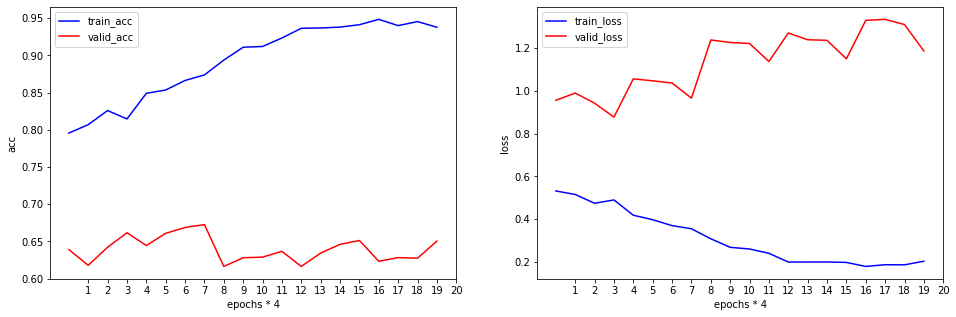

In [ ]:
# ephoc에 따라 loss 함수의 값과 acc의 변화를 보여준다.
trn_metrics = pd.DataFrame([ trn_history.loc[ indices[1] ].mean().tolist() for indices in trn_folds ], columns=['acc','loss'])
val_metrics = pd.DataFrame([ val_history.loc[ indices[1] ].mean().tolist() for indices in val_folds ], columns=['acc','loss'])

fig, ax = plt.subplots(1,2,figsize=(16,5))
epochs = num_epochs*n_mul+1  # x축 길이 

trn_metrics.acc.plot(color='b',ax=ax[0],label='train_acc')
val_metrics.acc.plot(color='r',ax=ax[0],label='valid_acc')

ax[0].set_xlabel(f'epochs * {n_mul}')
ax[0].set_ylabel('acc')
ax[0].set_xticks(range(1,epochs,1))
ax[0].legend()

trn_metrics.loss.plot(color='b',ax=ax[1],label='train_loss')
val_metrics.loss.plot(color='r',ax=ax[1],label='valid_loss')

ax[1].set_xlabel(f'epochs * {n_mul}')
ax[1].set_ylabel('loss')
ax[1].set_xticks(range(1,epochs,1))
ax[1].legend()


### 5. 모델 활용(예측/분류)

- 데이터 불러오기: test_df
- 동일한 전처리와 벡터화 적용
- predict


In [ ]:
import pandas as pd

data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 리뷰 평점 원본 로딩
test_df = pd.read_csv(f'{data_path}/test.csv')
test_df

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요
...,...,...
24995,24995,사용해보니 좋아요~^^
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...
24998,24998,역시 로네펠트!! 좋아요.


In [ ]:
# KoBERT 토크나이저
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

# Dim=64 벡터화 + 패딩 ==> 리뷰, 평점(0)
dataset_test = [ [s,0] for s in test_df['reviews'].tolist() ]
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

# 데이터 확인
data_test[0]

using cached model. /gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


(array([   2, 4451, 6607, 5330, 3211, 5337, 2959, 5934, 3868, 6999,    3,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(11, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
# 데이터로더
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=2)
pred_targets = []
print('ready to predict ...', end='\n\n')

# 예측값 출력
model.eval()    
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(test_dataloader)):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)

    valid_length= valid_length
    label = label.long().to(device)

    out = model(token_ids, valid_length, segment_ids)

    batch_pred=[]
    for i in out:
        logits = i
        logits = logits.detach().cpu().numpy()
        # 평점 예측 후처리: [0~4] + 1 => [1~5]
        batch_pred.append( np.argmax(logits) + 1 )

    # 예측값 모으기
    pred_targets += batch_pred


# 출력 확인
print('pred.len=', len(pred_targets), ', range:', min(pred_targets),'~',max(pred_targets))

ready to predict ...



  0%|          | 0/391 [00:00<?, ?it/s]

pred.len= 25000 , range: 1 ~ 5


In [ ]:
## 예측값 생성 및 저장
test_df['pred_target'] = np.array(pred_targets, dtype='int8')

test_df

,id,reviews,pred_target
0,0,채소가 약간 시들어 있어요,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,1
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,1
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,1
...,...,...,...
24995,24995,사용해보니 좋아요~^^,5
24996,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,5
24997,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,2
24998,24998,역시 로네펠트!! 좋아요.,5


### 6. 모델 시각화 (실제값/예측값)

- 예측값 시각화
- 실제값 시각화


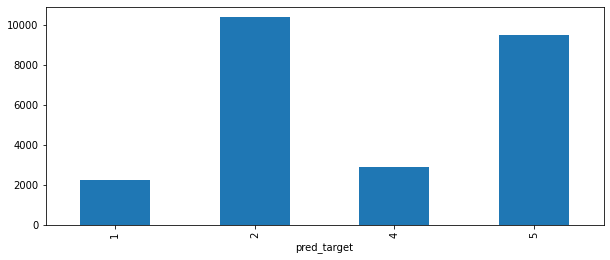

In [ ]:
# 예측값
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

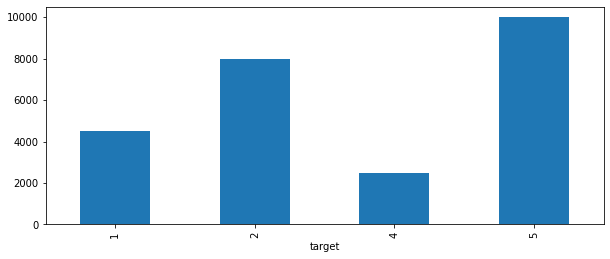

In [ ]:
# 훈련용 실제값
train_df.groupby('target').count()['id'].plot.bar(figsize=(10,4))

### 7. 예측값 저장 (제출용)


In [ ]:
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 제출용 파일 불러오기
submission = pd.read_csv(f'{data_path}/sample_submission.csv') 
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   target  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB
None


In [ ]:
# 예측값을 제출용 DF과 합치기 (NaN값 포함)

# left join: drop 된 rows 은 NaN 처리
submission_pred = pd.merge( 
    submission, 
    test_df[['id','pred_target']], 
    on='id',
    how='left'       # left, outer, right
    )
print('after MERGE:', submission_pred.shape )

# left join 으로 인한 NaN 조회
print(submission_pred.isna().sum())

# NaN 행 확인 (0개 행 맞음)
submission_pred[ submission_pred.isna().any(axis=1) ]

# merge 되면서 pred_target 이 float 로 바뀌었음 (왜지?)

# df1.join(df2) : 기본적으로 left join
# pd.merge(df1, df2, left_index=True, right_index=True) : 기본 inner join
# pd.concat([df1, df2], axis=1) : 기본 outer join

after MERGE: (25000, 3)
id             0
target         0
pred_target    0
dtype: int64


,id,target,pred_target


In [ ]:
# NaN 값을 포함한 컬럼의 형 변환시에는
# nullable 가능한 pd.Int64Dtype() 으로 바꿔야 가능
submission_pred['target'] = submission_pred['pred_target'].astype('Int8')

# 기존 target 컬럼 삭제
submission_pred = submission_pred.drop(columns=['pred_target'])

# 확인
submission_pred.dtypes

# **참고: 컬럼 이름 변경 
# submission_pred = submission_pred.rename(columns={'pred_target' : 'target'})

id        int64
target     Int8
dtype: object

In [ ]:
import pandas as pd
data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# submission.csv 저장
submission_pred.to_csv(data_path+'/submission_v5.csv', index=False, encoding='utf-8')

# ==> 채점 0.647 ()